Loaded X: (70000, 784), y: (70000,)
Clusters: 0, Noise points: 70000
Need ≥2 clusters for silhouette score.


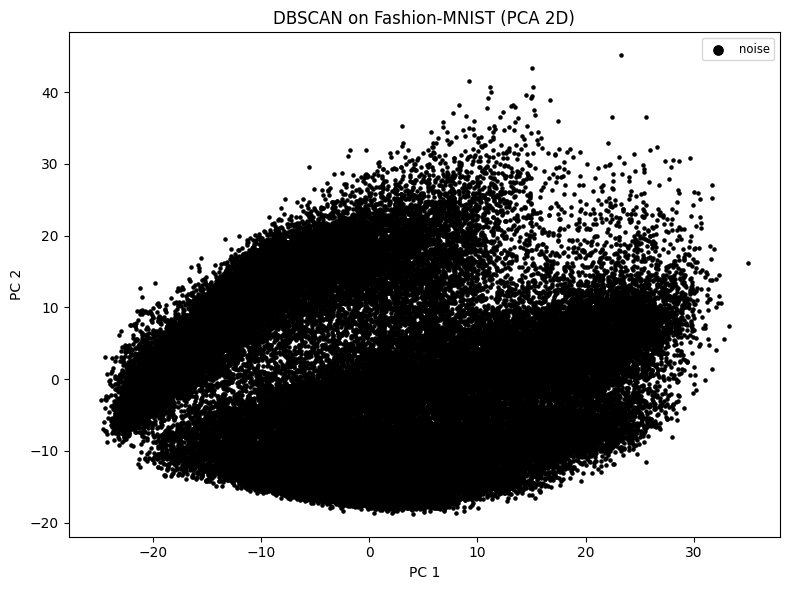

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


# Load the dataset
data_dir = '/Users/limengfeiyang/CMOR438-final-project/data/processed/fashion_mnist1'

X = np.load(os.path.join(data_dir, 'X_fashion.npy'))
y_true = np.load(os.path.join(data_dir, 'y_fashion.npy'))
print(f"Loaded X: {X.shape}, y: {y_true.shape}")


# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Run DBSCAN
db = DBSCAN(eps=3.0, # tune between ~2–5 for high-dimensional data
            min_samples=5,
            n_jobs=-1)
labels = db.fit_predict(X_scaled)



# Metrics & analysis
unique = set(labels)
n_clusters = len(unique) - (1 if -1 in unique else 0)
n_noise   = list(labels).count(-1)

print(f"Clusters: {n_clusters}, Noise points: {n_noise}")

mask = labels != -1
if len(set(labels[mask])) > 1:
    sil = silhouette_score(X_scaled[mask], labels[mask])
    print(f"Silhouette (no noise): {sil:.3f}")
else:
    print("Need ≥2 clusters for silhouette score.")


# Visualize on PCA-reduced 2D
pca = PCA(n_components=2)
X2 = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
colors = plt.cm.tab10(np.linspace(0,1,n_clusters))
for k, col in zip(sorted(unique), list(colors)+['k']):
    pts = (labels == k)
    lbl = 'noise' if k == -1 else f'cluster {k}'
    plt.scatter(X2[pts,0], X2[pts,1], s=5, c=[col], label=lbl)

plt.title('DBSCAN on Fashion-MNIST (PCA 2D)')
plt.xlabel('PC 1'); plt.ylabel('PC 2')
plt.legend(markerscale=3, fontsize='small', ncol=2)
plt.tight_layout()
plt.show()
